## A. Applying a Logistic Regression model with Elastic net penalty using Sklearn

In [225]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt

from matplotlib import cm

from matplotlib import font_manager
font_path = 'C://Users//amita//AppData//Local//Microsoft//Windows//Fonts/Barlow-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

In [226]:
data = pd.read_csv('chowdary.csv', index_col=0)

y = data['tumour']
X = data.drop('tumour', axis=1)

In [227]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=data.columns[1:])

In [ ]:
clf = LogisticRegressionCV(Cs=[1, 1.25, 1.66, 2.5, 5, 10], cv=5, penalty='elasticnet', l1_ratios=[0.25,0.5,0.75], solver='saga', tol=1e-6, max_iter=100000, scoring='f1')
clf.fit(X_scaled, y)

In [230]:
### Penalty term(lambda) vs 5 fold cross validation score:
dict(zip([1, 1.25, 1.66, 2.5, 5, 10], np.mean(clf.scores_['C'], axis=0)))

{1: array([0.96601307, 0.94489164, 0.94489164]),
 1.25: array([0.96601307, 0.94489164, 0.94489164]),
 1.66: array([0.96601307, 0.95665635, 0.94489164]),
 2.5: array([0.96601307, 0.95665635, 0.95665635]),
 5: array([0.96601307, 0.95665635, 0.95665635]),
 10: array([0.96601307, 0.95665635, 0.95665635])}

In [231]:
print(f"Best penalty value is: {clf.C_}")

Best penalty value is: [1.]


In [232]:
print(f"Best l1 ratio value is: {clf.l1_ratio_}")

Best l1 ratio value is: [0.25]


In [138]:
coeff_df[coeff_df['Coefficient']!=0].to_clipboard()

### Checking if variables in the final Lasso are there in Elasticnet

In [131]:
lasso_vars = [ 48,  14,  15, 114, 101, 141, 127,   6, 108,  28,   2,  40, 162, 4,  13,  80,  56,  10, 173, 107]

print([k for k in lasso_vars if k not in coeff_df[coeff_df['Coefficient']!=0].index])

[]


### They all are present.

In [132]:
from sklearn.metrics import f1_score

In [136]:
f1_score(y.values, clf.predict(X_scaled), average="binary", pos_label="B")

0.991869918699187

# Running model again with more parameters

In [358]:
clf2 = LogisticRegressionCV(Cs=[0.01, 0.1, 0.2, 0.5, 0.75, 0.9, 1], cv=5, penalty='elasticnet', l1_ratios=[0.1, 0.25, 0.5, 0.75, 1], solver='saga', tol=1e-6, max_iter=100000, scoring='f1')
clf2.fit(X_scaled, y)

coeff_df2 = pd.DataFrame({'Variable': X.columns, 'Coefficient': clf2.coef_[0]})
coeff_df2 = coeff_df2.reindex(coeff_df2.Coefficient.abs().sort_values(ascending=False).index)
print(coeff_df2[coeff_df2['Coefficient']!=0].shape)
coeff_df2[coeff_df2['Coefficient']!=0]

(87, 2)


,Variable,Coefficient
48,X204653_at,-0.293085
114,X209604_s_at,-0.252940
101,X209016_s_at,-0.245918
107,X209343_at,-0.244134
13,X202575_at,-0.217710
...,...,...
22,X203438_at,-0.007062
128,X212531_at,0.006980
92,X207529_at,0.005127
134,X213317_at,0.003909


In [359]:
print(f"Best penalty value is: {clf2.C_}")

Best penalty value is: [0.1]


In [360]:
print(f"Best l1 ratio value is: {clf2.l1_ratio_}")

Best l1 ratio value is: [0.1]


In [361]:
### Penalty term(lambda) vs 5 fold cross validation score:
out_dict = dict(zip([0.01, 0.1, 0.2, 0.5, 0.75, 0.9, 1], np.mean(clf2.scores_[1], axis=0)))
out_dict

{0.01: array([0.84018335, 0.        , 0.        , 0.11034483, 0.        ]),
 0.1: array([0.97647059, 0.94332301, 0.91601307, 0.92647059, 0.92647059]),
 0.2: array([0.96601307, 0.94332301, 0.92136223, 0.90665635, 0.92647059]),
 0.5: array([0.96601307, 0.95665635, 0.92136223, 0.92136223, 0.94332301]),
 0.75: array([0.96601307, 0.95665635, 0.94489164, 0.93165635, 0.94332301]),
 0.9: array([0.96601307, 0.96601307, 0.94489164, 0.93165635, 0.95665635]),
 1: array([0.96601307, 0.96601307, 0.94489164, 0.94489164, 0.95665635])}

### Plotting these results:

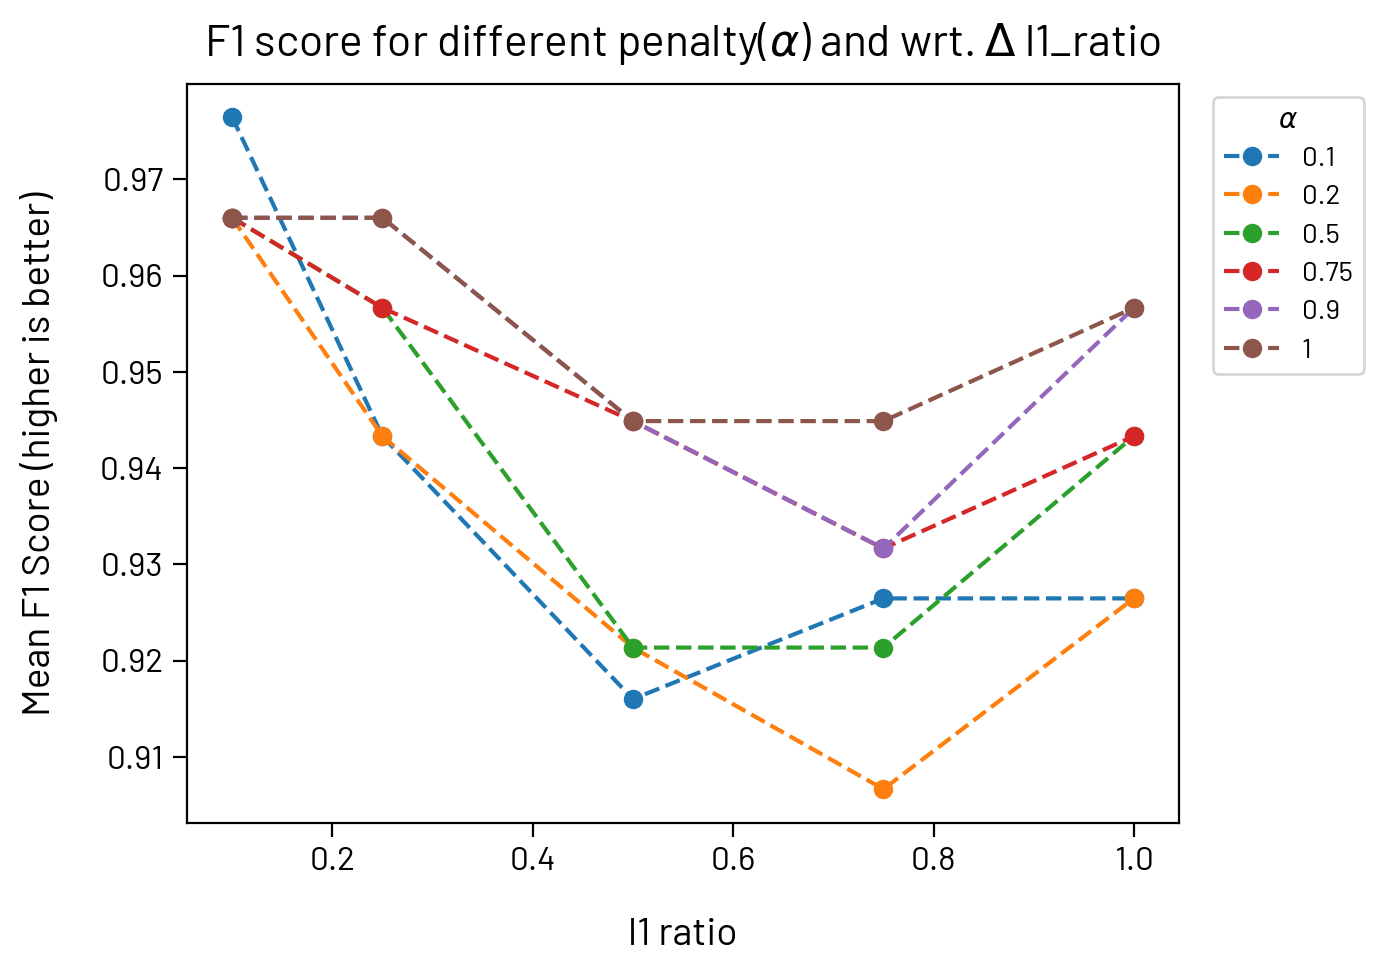

In [323]:
# Define the l1_ratio values
l1_ratios = [0.1, 0.25, 0.5, 0.75, 1]

plt.figure(dpi=200)
# Plot the results for each l1_ratio
for key,vals in out_dict.items():
    if key==0.01:
        continue
    plt.plot(l1_ratios, vals, '--o', label=f'{key}')

plt.title(r'F1 score for different penalty($\alpha$) and wrt. $\Delta$ l1_ratio', fontsize=16, pad=10)
# Add labels and legend
plt.xlabel('l1 ratio', fontsize=14, labelpad=15)
plt.ylabel('Mean F1 Score (higher is better)', fontsize=14, labelpad=15)
plt.legend(title=r'$\alpha$', bbox_to_anchor=(1.2,1))
plt.tick_params(size=5, labelsize=12)

# Show the plot
plt.show()

## Fitting the best model with best alpha

In [331]:
model = LogisticRegression(penalty='elasticnet', solver='saga', C=0.1, l1_ratio=0.1,
                          tol=1e-6, max_iter=100000)

model.fit(X_scaled, y)

LogisticRegression(C=0.1, l1_ratio=0.1, max_iter=100000, penalty='elasticnet',
                   solver='saga', tol=1e-06)

In [332]:
coeff_df2 = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
coeff_df2 = coeff_df2.reindex(coeff_df2.Coefficient.abs().sort_values(ascending=False).index)
print(coeff_df2[coeff_df2['Coefficient']!=0].shape)
coeff_df2[coeff_df2['Coefficient']!=0]

(87, 2)


,Variable,Coefficient
48,X204653_at,-0.293084
114,X209604_s_at,-0.252939
101,X209016_s_at,-0.245917
107,X209343_at,-0.244133
13,X202575_at,-0.217709
...,...,...
22,X203438_at,-0.007060
128,X212531_at,0.006980
92,X207529_at,0.005127
134,X213317_at,0.003910


In [333]:
f1_score(y_encoded, np.round(model.predict(X_scaled)))

0.9761904761904762

In [335]:
coeff_df[coeff_df['Coefficient']!=0].to_clipboard()

### Fitting the Logistic Regression model with alpha=0.1

In [336]:
import numpy as np
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import KFold

# Set up the values of alpha to test
alpha = 0.1

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = []

model = LogisticRegression(penalty='elasticnet', solver='saga', C=0.1, l1_ratio=0.1,
                          tol=1e-6, max_iter=100000)

# Loop over the different folds
for train_idx, val_idx in kf.split(X_scaled):
    # Split the data into training and validation sets for this fold
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    # Fit the model on the training set for this fold and alpha value
    fitted_log = model.fit(X_train, y_train)

    # Calculate and add f1 score on validation set
    y_val_pred = fitted_log.predict(X_val)
    y_val_pred_binary = (y_val_pred > 0.5).astype(int)
    f1_scores.append(f1_score(y_val, y_val_pred_binary))

In [337]:
f1_scores

[0.9411764705882353, 1.0, 1.0, 1.0, 0.9473684210526316]

In [338]:
np.mean(f1_scores)

0.9777089783281735